In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from unyt import foot, meter, kW

# Retrieve all buildings within the Armourdale core.

In [3]:
sunroof = gpd.read_file("../data/spatial_data/armourdale_rooftop_potential.gpkg")

In [4]:
armourdale = gpd.read_file("../data/spatial_data/armourdale_shape.gpkg")

<Axes: >

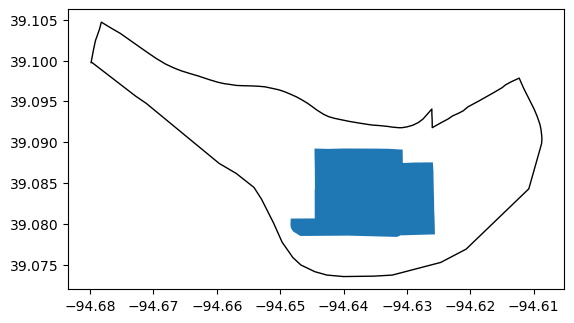

In [5]:
fig, ax = plt.subplots()
sunroof.plot(ax=ax)
armourdale.plot(ax=ax, fc='None', ec='k')

In [6]:
buildings = gpd.read_file('../data/spatial_data/armourdale/building_footprints.gpkg')

In [7]:
core_buildings = buildings.sjoin(sunroof, predicate='within')

In [8]:
core_buildings.columns

Index(['THEME1', 'THEME2', 'FEATURECOD', 'NAME', 'AGENCY', 'ADDRESS',
       'CITY_left', 'ZIP', 'COMMENT', 'CHNG_TYPE', 'SOURCE', 'X', 'Y',
       'NUMSTORY', 'BLDGHEIGHT', 'THEME3', 'LAT', 'LONG', 'MOD_BY', 'ADDED_BY',
       'DATE_MOD', 'DATE_ADDED', 'Shape__Are', 'Shape__Len', 'geometry',
       'index_right', 'region_name', 'state_name', 'lat_max', 'lat_min',
       'lng_max', 'lng_min', 'lat_avg', 'lng_avg',
       'yearly_sunlight_kwh_kw_threshold_avg', 'count_qualified',
       'percent_covered', 'percent_qualified', 'number_of_panels_n',
       'number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w',
       'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_o

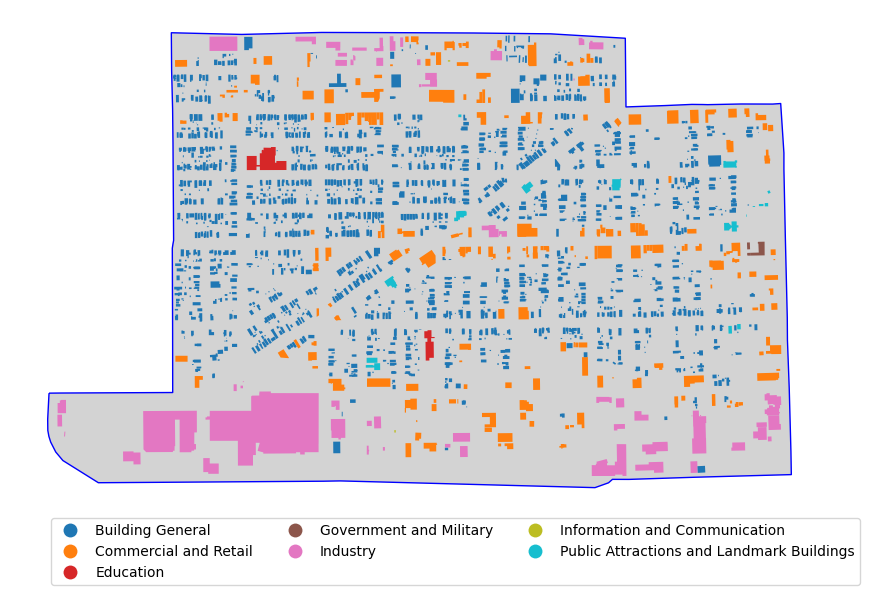

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
core_buildings.plot(ax=ax, column='FEATURECOD', legend=True, legend_kwds=dict(loc=(0.05,-0.15), ncol=3))
# armourdale.plot(ax=ax, fc='lightgray', ec='k', zorder=0, alpha=0.5)
sunroof.plot(ax=ax, fc='lightgray', ec='b', lw=1, zorder=0)
plt.tight_layout()
ax.set_axis_off()

# Calculate the area of each building

In [10]:
core_buildings = core_buildings.assign(building_area=core_buildings.to_crs(epsg=5070).area)

In [11]:
core_buildings = core_buildings.assign(area_fraction = core_buildings['building_area'] / core_buildings['building_area'].sum())

In [12]:
kw_total = core_buildings['kw_total'].unique()[0] * kW

In [13]:
core_buildings.groupby(['FEATURECOD']).sum(numeric_only=True)['area_fraction'].to_frame().loc[['Building General',
                                                                                               'Commercial and Retail',
                                                                                               'Industry']]*kw_total

,area_fraction
FEATURECOD,
Building General,9963.985320
Commercial and Retail,5193.889979
Industry,6815.730465


In [14]:
total_area = core_buildings['building_area'].sum()*meter**2

In [15]:
unit_area = (4*kW) / (211*foot**2)
unit_area

unyt_quantity(0.01895735, 'kW/ft**2')

In [16]:
kw_total

unyt_quantity(22833.75, 'kW')

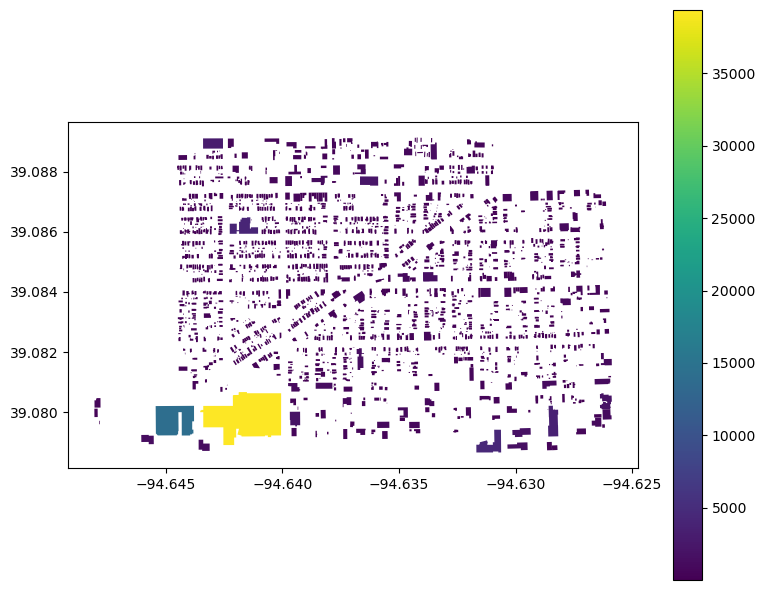

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
core_buildings.plot(ax=ax, column='building_area', legend=True)
plt.tight_layout()

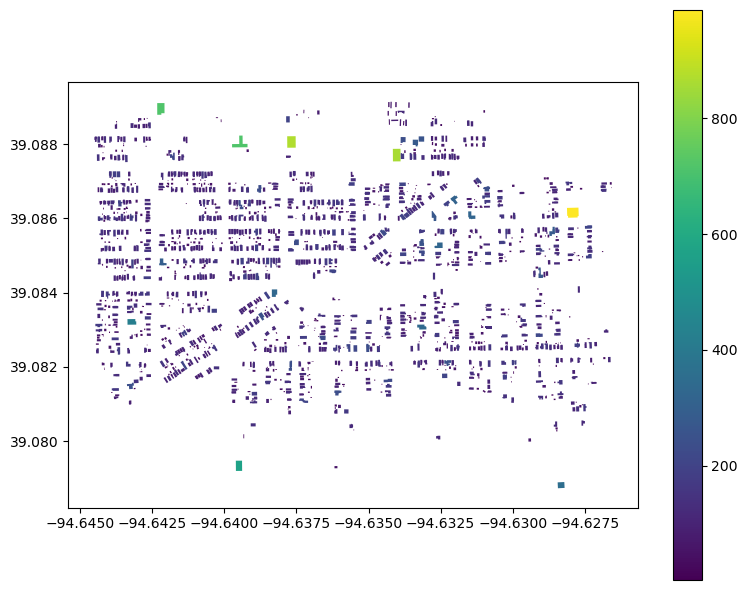

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
core_buildings.loc[core_buildings['FEATURECOD'].isin(['Building General'])].plot(ax=ax, column='building_area', legend=True)
plt.tight_layout()

In [45]:
core_buildings['FEATURECOD'].value_counts()

Building General                             1526
Commercial and Retail                         202
Industry                                       57
Public Attractions and Landmark Buildings      16
Government and Military                         3
Information and Communication                   2
Education                                       2
Name: FEATURECOD, dtype: int64

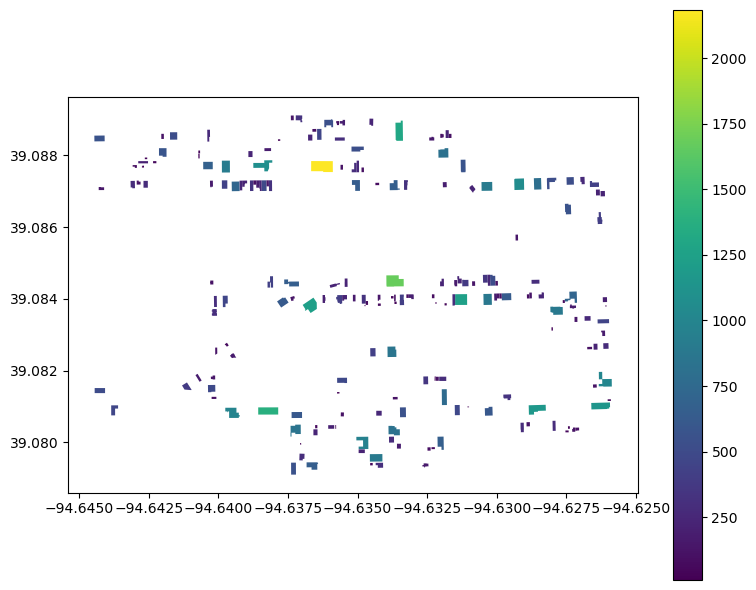

In [46]:
fig, ax = plt.subplots(figsize=(8,6))
core_buildings.loc[core_buildings['FEATURECOD'].isin(['Commercial and Retail'])].plot(ax=ax, column='building_area', legend=True)
plt.tight_layout()

In [47]:
core_buildings.columns

Index(['THEME1', 'THEME2', 'FEATURECOD', 'NAME', 'AGENCY', 'ADDRESS',
       'CITY_left', 'ZIP', 'COMMENT', 'CHNG_TYPE', 'SOURCE', 'X', 'Y',
       'NUMSTORY', 'BLDGHEIGHT', 'THEME3', 'LAT', 'LONG', 'MOD_BY', 'ADDED_BY',
       'DATE_MOD', 'DATE_ADDED', 'Shape__Are', 'Shape__Len', 'geometry',
       'region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'e

In [51]:
core_buildings.loc[core_buildings['FEATURECOD'].isin(['Commercial and Retail'])].loc[:, 'THEME3'].value_counts()

NC    135
Name: THEME3, dtype: int64

Get vacant parcels

In [92]:
parcels['Shape_Area']

0        1.294453e+06
1        3.424272e+06
2        7.356163e+06
3        2.914559e+04
4        2.778234e+06
             ...     
67781    6.116406e+03
67782    6.036308e+03
67783    1.027241e+06
67784    1.085022e+04
67785    8.179494e+04
Name: Shape_Area, Length: 67786, dtype: float64

In [91]:
buildings.columns

Index(['THEME1', 'THEME2', 'FEATURECOD', 'NAME', 'AGENCY', 'ADDRESS', 'CITY',
       'ZIP', 'COMMENT', 'CHNG_TYPE', 'SOURCE', 'X', 'Y', 'NUMSTORY',
       'BLDGHEIGHT', 'THEME3', 'LAT', 'LONG', 'MOD_BY', 'ADDED_BY', 'DATE_MOD',
       'DATE_ADDED', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

In [19]:
parcels = gpd.read_file('../data/spatial_data/armourdale/parcels.gpkg')
vacant_parcels = gpd.read_file('../data/spatial_data/armourdale/vacant_parcels.gpkg')

In [20]:
non_vacant_df = parcels.loc[~parcels['PARCEL'].isin(vacant_parcels['PARCEL'].values)]

In [21]:
non_vacant_df = non_vacant_df.sjoin(armourdale, predicate='within').drop(columns=['index_right'])

In [22]:
core_buildings = core_buildings.drop(columns=['index_right'])

In [95]:
inhabited[['Shape_Area', 'Shape__Are']]

,Shape_Area,Shape__Are
21858,134121.623419,1292.407908
21867,121119.563452,808.705081
21889,12249.901201,59.783524
21951,12249.901201,1302.073732
22093,5383.474243,995.018923
...,...,...
88124,11723.714630,122.811691
88126,9428.960315,579.409618
88128,13849.235090,501.120281
88130,4778.174101,182.988778


In [23]:
inhabited = core_buildings.loc[core_buildings['FEATURECOD'].isin(['Building General'])].sjoin(non_vacant_df, predicate='within')

## Assumption

1. Rooftop potential is distributed proportionally across all rooftop sectors.
2. There is some factor, E, that represents the fraction of actual suitable rooftop area.

In [24]:
inhabited.area_fraction.sum() * kw_total

unyt_quantity(6079.45687907, 'kW')

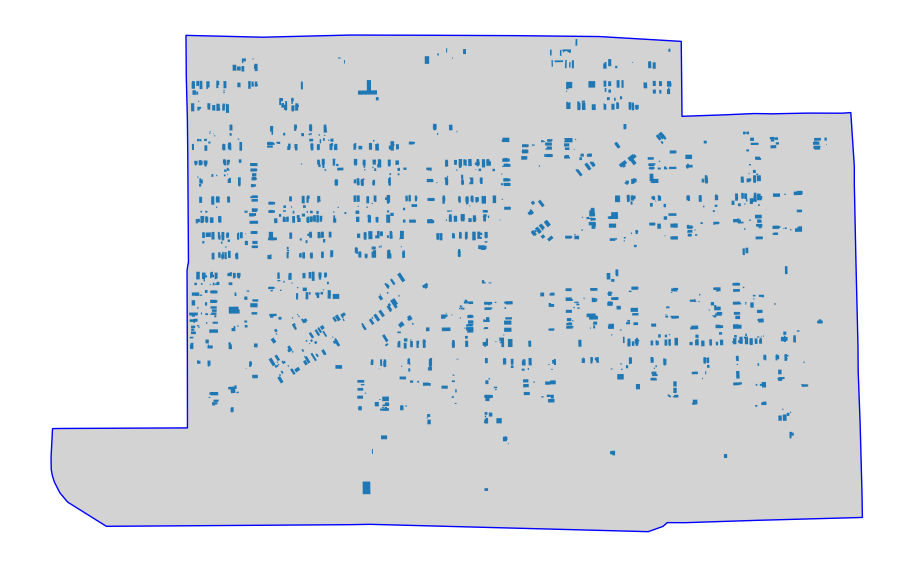

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
# core_buildings.loc[core_buildings['FEATURECOD'].isin(['Building General'])].plot(ax=ax, column='FEATURECOD')
inhabited.plot(ax=ax, )
# armourdale.plot(ax=ax, fc='lightgray', ec='k', zorder=0, alpha=0.5)
sunroof.plot(ax=ax, fc='lightgray', ec='b', lw=1, zorder=0)
plt.tight_layout()
ax.set_axis_off()

In [39]:
inhabited.shape

(972, 68)

In [55]:
unit_area

unyt_quantity(0.01895735, 'kW/ft**2')

In [115]:
(inhabited['Shape__Are'] * unit_area).describe(percentiles=[.1, 0.165, .25, .5, .75, .95])

count    972.000000
mean      17.432131
std       12.997489
min        0.515257
10%        1.928423
16.5%      2.992695
25%        6.192480
50%       18.375387
75%       24.719141
95%       36.167172
max      145.933488
Name: Shape__Are, dtype: float64

In [119]:
2.8 / 0.37

7.5675675675675675

In [121]:
3 / 0.37

8.108108108108109

In [120]:
24 / 0.37

64.86486486486487

In [118]:
25 / (1/0.37)

9.25

In [117]:
(inhabited.loc[((inhabited['Shape__Are'] * unit_area) > 25), 'Shape__Are']*unit_area).sum() / 1000

7.8733677860005695

In [124]:
from unyt import acre

In [126]:
(2810*kW) / unit_area.to(kW/acre)

unyt_quantity(3.40283517, 'acre')

Text(0.5, 0, 'Estimated kW per Roof')

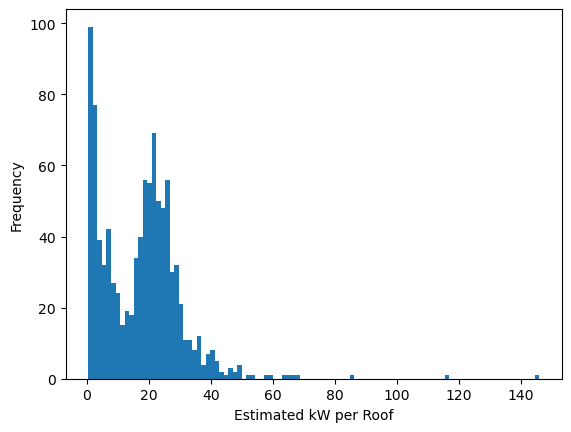

In [98]:
fig, ax = plt.subplots()
(inhabited['Shape__Are'] * unit_area).plot.hist(ax=ax, bins=100)
ax.set_xlabel("Estimated kW per Roof")

Text(0.5, 0, 'Estimated kW per Roof')

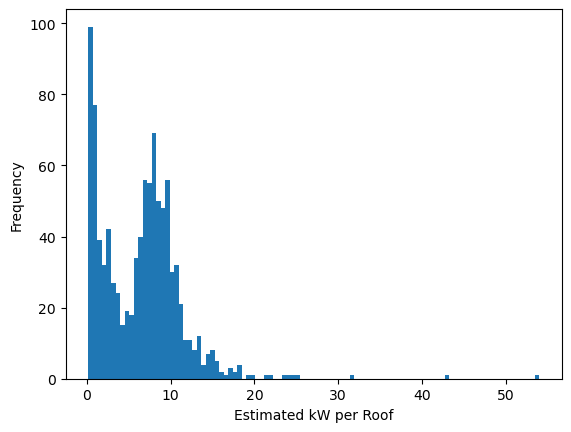

In [113]:
fig, ax = plt.subplots()
(inhabited['Shape__Are'] * unit_area / (1/0.37)).plot.hist(ax=ax, bins=100)
ax.set_xlabel("Estimated kW per Roof")

## Park Areas

In [26]:
parks = gpd.read_file('../data/spatial_data/armourdale/parks.gpkg')

In [27]:
parks

,PARKS_ID,NAME,Shape_Leng,Shape_Area,ZIP,DATEMOD,DATEADDED,DEV_ACRE,UNDEV_ACRE,TOTAL_ACRE,...,TRACK,SPRAY_PARK,PLAY_PAD,DOG_RUN,PIC_TABLE,CITY,TYPE,COMMENT,ADDRESS,geometry
0,1,Wyandotte Co Lake,46695.764713,6.147028e+07,66109,2010-05-04,2010-05-04,0.0,0.0,1402.811279,...,None,None,None,Y,None,Kansas City,Regional Park,400 acre lake,Leavenworth Rd & N 91st St,"MULTIPOLYGON (((-94.76616 39.16852, -94.76616 ..."
1,2,Wyandotte Co Lake,7911.596242,1.099166e+06,66109,2010-05-04,2010-05-04,0.0,0.0,25.233259,...,None,None,None,None,None,Kansas City,Regional Park,spillway slough,8124r Wolcott Dr,"MULTIPOLYGON (((-94.76524 39.17592, -94.76277 ..."
2,4,Quindaro,3859.471645,7.730992e+05,66104,2010-05-04,2010-05-04,0.0,0.0,17.633940,...,None,None,None,None,Y,Kansas City,Neighborhood Park,None,Sewell Ave & N 34th St,"MULTIPOLYGON (((-94.66803 39.14613, -94.66845 ..."
3,6,Roswell,5811.686684,1.168415e+06,66101,2011-03-23,2010-05-04,0.0,0.0,13.923965,...,None,None,None,None,None,Kansas City,Neighborhood Park,None,Manorcrest Dr & N 7th St Trfwy,"MULTIPOLYGON (((-94.62444 39.14172, -94.62435 ..."
4,7,Garland,8904.375882,1.884229e+06,66101,2010-05-04,2010-05-04,0.0,0.0,43.255947,...,None,None,None,None,None,Kansas City,Neighborhood Park,contaminated & closed,301 Roswell Ave,"MULTIPOLYGON (((-94.61536 39.13298, -94.61536 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0,City,13119.185729,3.596500e+06,66102,2011-03-22,2011-03-22,0.0,0.0,0.000000,...,None,None,None,None,None,Kansas City,None,None,Park Dr & S 26th St,"MULTIPOLYGON (((-94.66789 39.1039, -94.66789 3..."
65,0,Northrup,3226.782966,3.234217e+05,66101,2011-03-23,2011-03-23,0.0,0.0,0.000000,...,None,None,None,None,None,Kansas City,Neighborhood Park,None,Grandview Blvd & N 10th St,"MULTIPOLYGON (((-94.63527 39.11125, -94.6352 3..."
66,24,Jersey Creek,1235.601197,8.141766e+04,66101,2010-05-04,2010-05-04,0.0,0.0,1.869092,...,None,None,None,None,None,Kansas City,Neighborhood Park,None,Parallel Pkwy & N 13th St,"MULTIPOLYGON (((-94.62922 39.12424, -94.62922 ..."
67,24,Jersey Creek,5527.890780,8.759639e+05,66101,2010-05-04,2010-05-04,0.0,0.0,1.869092,...,None,None,None,None,None,Kansas City,Neighborhood Park,None,Parallel Pkwy & N 13th St,"MULTIPOLYGON (((-94.62896 39.12539, -94.62669 ..."


In [28]:
armourdale_parks = parks.sjoin(armourdale, predicate='within')

<Axes: >

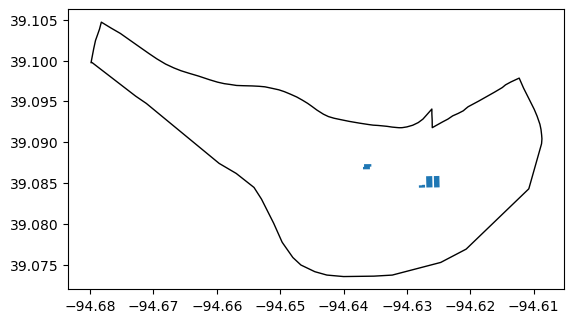

In [29]:
fig, ax = plt.subplots()
armourdale_parks.plot(ax=ax)
armourdale.plot(ax=ax, fc='None')

In [30]:
from unyt import acre

In [43]:
(1/unit_area)*(2.89*kW)

unyt_quantity(152.4475, 'ft**2')

In [31]:
unit_area

unyt_quantity(0.01895735, 'kW/ft**2')

In [32]:
(1.67*acre).to(foot**2)*unit_area

unyt_quantity(1379.05592417, 'kW')

In [33]:
armourdale_parks

,PARKS_ID,NAME,Shape_Leng,Shape_Area,ZIP,DATEMOD,DATEADDED,DEV_ACRE,UNDEV_ACRE,TOTAL_ACRE,...,DOG_RUN,PIC_TABLE,CITY_left,TYPE,COMMENT,ADDRESS,geometry,index_right,CITY_right,WARD
20,64,Bill Clem,1212.905396,72983.420466,66105,2010-05-04,2010-05-04,0.0,0.0,1.675469,...,None,Y,Kansas City,Neighborhood Park,None,Kansas Ave & S 10th St,"MULTIPOLYGON (((-94.63561 39.08731, -94.63561 ...",0,Kansas City,06
21,67,Shawnee,3865.413812,295406.668890,66105,2010-05-04,2010-05-04,0.0,0.0,0.719724,...,None,None,Kansas City,Neighborhood Park,Armourdale rec center,730 Osage Ave,"MULTIPOLYGON (((-94.62713 39.08444, -94.6281 3...",0,Kansas City,06


## Impervious land

In [34]:
impervious = gpd.read_file("../data/spatial_data/armourdale/impervious_land_cover.gpkg")

In [35]:
armourdale_impervious = impervious.sjoin(armourdale, predicate='within')

In [36]:
armourdale_impervious['impervio_1'].value_counts()

Pervious                    2641
Buildings                   2337
Sidewalks                   1072
Driveways                    662
Decks/Patios                 381
Parking Lots                 289
Concrete Pads                271
Miscellaneous Structures     203
Railroad Ballast              93
Roads                         28
Parking Lots-Dirt             10
Pools-Above-Ground             9
Driveways-Dirt                 8
Bridges                        8
Roads-Dirt                     6
Athletic Facilities            5
Name: impervio_1, dtype: int64

<Axes: >

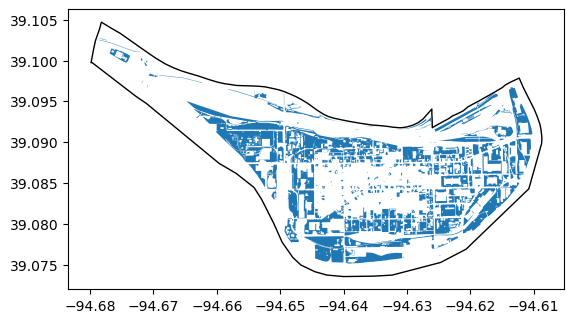

In [37]:
fig, ax = plt.subplots()
armourdale_impervious.loc[armourdale_impervious['impervio_1'].isin([
                                                                    'Parking Lots',
                                                                    'Concrete Pads',
                                                                    'Parking Lots-Dirt'
                                                                    ])].plot(ax=ax)
armourdale.plot(ax=ax, fc='None')

In [41]:
sunroof.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count', 'CITY', 'WARD',
       'geometry'],
      dtype='object')